In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import re
# from google_trans_new import google_translator
# from translate import Translator
# from googletrans import Translator
from itertools import chain
import glob
import seaborn as sns
import matplotlib.font_manager as font_manager
import seaborn as sns
import matplotlib as mpl
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import SGDRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMRegressor
from collections import Counter
from pandas import read_csv
from datetime import datetime
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.plotting import register_matplotlib_converters
import warnings
import itertools
import math
# translator = google_translator()
# translator = Translator(to_lang='ch')
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
register_matplotlib_converters()

In [201]:
import warnings
warnings.filterwarnings("ignore")

In [22]:
translator.translate('エンジン型式')

'MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE TRANSLATIONS FOR TODAY. NEXT AVAILABLE IN  16 HOURS 09 MINUTES 00 SECONDSVISIT HTTPS://MYMEMORY.TRANSLATED.NET/DOC/USAGELIMITS.PHP TO TRANSLATE MORE'

In [6]:
sns.set_theme()
mpl.matplotlib_fname()
font_dirs = ['D:\\Software\\Anaconda\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf' ]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
mpl.font_manager._rebuild()
result = font_manager.findfont("Rounded Mplus 1c")
print(result)
mpl.rc('font', family='Rounded Mplus 1c')

Matplotlib is building the font cache; this may take a moment.


D:\Software\Anaconda\Lib\site-packages\matplotlib\mpl-data\fonts\ttf\MPLUSRounded1c-Regular.ttf


In [414]:
def normal_brand(brand) : 
    if brand == 'ﾎﾝﾀﾞ':
        return "HONDA"
    elif brand == 'ﾄﾖﾀ':
        return 'TOYOTA'
    elif brand == 'ﾐﾂﾋﾞｼ':
        return 'MITSUBISHI'
    elif brand == 'ﾆｯｻﾝ':
        return 'NISSAN'
    elif brand == 'ｽﾊﾞﾙ':
        return 'SUBARU'
    elif brand == 'ﾏﾂﾀﾞ':
        return 'MAZDA'
    else:
        return 'others'
    
list_brand  = ['TOYOTA','MAZDA','MITSUBISHI','HONDA','NISSAN','SUBARU']



def extract_engine_data (description, list_em):
    engine_model = []
    for e in list_em:
        em_reg = re.findall(r'\b{}-\w+-?\w*\b'.format(e), description)
        if len(em_reg) != 0 :
          em_reg = map(lambda x : x.split('-')[0],em_reg)
#           em_reg = list(set(em_reg)) 
          engine_model.append(em_reg)
    if len(engine_model) != 0:
      return list(chain(*engine_model))
    else: 
      return []

def extract_specific_engine_data (description, engine):
    engine_model = []
#     for e in list_em:
    em_reg = re.findall(r'\b{}-\w+-?\w*\b'.format(engine), description)
    if len(em_reg) != 0 :
      em_reg = map(lambda x : x.split('-')[0],em_reg)
      engine_model.append(em_reg)
    if len(engine_model) != 0:
      return list(chain(*engine_model))
    else: 
      return []

def correlation(a, b):
    v = np.subtract(b[1],a[0]).round(decimals=3)
    return v

def count_em(engine, list_em):
    count = 0
    for i in list_em:
        if i  == engine:
            count+=1
    return count

def to_1D(series):
 return pd.Series([x for _list in series for x in _list])

In [7]:
df_sale = pd.read_csv('Kaiho_merged_data.csv')

In [23]:
df_sale.columns

Index(['Vị trí_ロケーション', 'Ngày sản xuất_生産日', 'Tháng sản xuất_生産月',
       'Năm sản xuất_生産年', 'Nv sản xuất_生産担当者', 'Số nhập kho_入庫番号',
       'Nguồn nhập hàng_仕入先', 'Mã loại phụ tùng_商品コード', 'Tên phụ tùng_商品名',
       'Số nhập kho(phụ tùng)_入庫番号 (部品)', 'Tên xe_車名', 'Model xe_車輌型式',
       'Engine model_エンジン型式', 'Số lượng_数量_PARTS', 'Tổng giá nhập_仕入合計',
       'Số phút công_標準工数', 'Kết quả_生産高',
       'Ước tính giá bán ra tại thời điểm nhập hàng_仕入時販売予測額',
       'Ước tính giá bán ra tại thời điểm sản xuất_生産時販売予測額',
       'Số lượng bán ra_販売数量', 'Thành tích bán ra_販売実績', 'Khách hàng_仕向先',
       'Truyền động 1_駆動1', 'TM_TM', 'Truyền động 2_駆動2', 'Chi tiết_詳細',
       'Số km đã chạy_走行距離', 'Năm sản xuất_年式', 'Tình trạng engine_エンジン状態',
       'Rank_ランク', 'Loại xe_車種', 'Tình trạng sản xuất_未生産',
       'Ước tính giá bán ra tại thời điểm nhập hàng_仕入時販売予測額.1',
       'Số chỉ định loại_型式指定番号', 'Số phân loại danh mục_類別区分番号',
       'Đơn giá mua_仕入単価', 'Nhà sản xuất_メーカー', 'Giờ làm việc

In [24]:
df_group_model_car = df_sale.groupby(['Nhà sản xuất_メーカー','Tên xe_車名','Model xe_車輌型式']).agg(count_model = ('Model xe_車輌型式','count'))

In [25]:
df_group_model_car

count_model
Nhà sản xuất_メーカー Tên xe_車名 Model xe_車輌型式             
BMW               BMW-MINI  WMWRA32                  2
                            WMWRC32                  2
                            WMWRE32                  1
                  BMW318i   WBAAN92                  1
                            WBAAP32                  1
...                                                ...
ﾒﾙｾﾃﾞｽ･ﾍﾞﾝﾂ       ベンツVクラス   VSA63829                 1
ﾙﾉｰ               ﾒｶﾞｰﾇ     VF1BM1                   1
                  ﾙｰﾃｼｱ     VF1BR1B                  1
                            VF1BR1B0                 1
                            VF1BRCB0                 1

[2014 rows x 1 columns]

In [29]:
df_sale['brand_normal'] =  df_sale['Nhà sản xuất_メーカー'].map(lambda x: normal_brand(x))

In [42]:
list_concat = []

In [33]:
for brand in list_brand:
    globals()[f'df_{brand.lower()}']  = df_sale[df_sale.brand_normal == brand]

In [45]:
for brand in list_brand:
    globals()[f'list_model_{brand.lower()}']  = list(globals()[f'df_{brand.lower()}']['Model xe_車輌型式'].unique())
    globals()[f'list_brand_{brand.lower()}']  = [brand] * len(globals()[f'list_model_{brand.lower()}'])
    globals()[f'df_list_model_{brand.lower()}']  = pd.DataFrame(list(zip(globals()[f'list_model_{brand.lower()}'],globals()[f'list_brand_{brand.lower()}'])),columns = ['model_car','brand'])
    list_concat.append(globals()[f'df_list_model_{brand.lower()}'])

In [46]:
df_concat_model  = pd.concat(list_concat)
df_concat_model.to_csv('list_brand_model.csv')

In [52]:
df_brand_model = pd.read_csv('list_brand_model.csv')

In [54]:
df_brand_model.drop(columns='Unnamed: 0',inplace=True)

In [55]:
df_brand_model

,model_car,brand
0,AT211,TOYOTA
1,NCP12,TOYOTA
2,EL55,TOYOTA
3,ACM26,TOYOTA
4,ZNE14,TOYOTA
...,...,...
1354,BC5,SUBARU
1355,GF3,SUBARU
1356,GC1,SUBARU
1357,AP3,SUBARU


# Merge all HS code

In [68]:
list_hs_code = ['870321','870322','870324','870331','870332','870333','870390']

In [69]:
list_all_data = []
for code in list_hs_code:
    globals()[f'all_data_{code}']  = pd.DataFrame()
    for f in glob.glob(f'C:/Users/Admin/Github/GTO_Data_Full/{code}/*.xls'):
        df = pd.read_excel(f,sheet_name=1)
        globals()[f'all_data_{code}'] = globals()[f'all_data_{code}'].append(df,ignore_index=True)
    list_all_data.append(globals()[f'all_data_{code}'])

7

In [75]:
all_data_870323 = pd.DataFrame()
for f in glob.glob('C:/Users/Admin/Github/GTO_Data_Full/870323/*.xls'):
    df = pd.read_excel(f,sheet_name=0)
    all_data_870323 = all_data_870323.append(df,ignore_index=True)

In [76]:
all_data_870323

,Register Date,HS Code,Product Description,Producer,Brand,Place of Receipt,Country of Origin,Country of Sales,Shipper,Shipper Address,Consignee,Consignee Address,Quantity,Unit of Measure,Incoterms,Gross Weight in KG,Net Weight in KG,Cargo Value USD
0,2011-01-05,8703231910,"ЛЕГКОВЫЕ А/М, ПРЕДН. ДЛЯ ПЕРЕВОЗКИ ЛЮДЕЙ, С ДВ...",ЗАО ДЖИ ЭМ УЗБЕКИСТАН УЗБЕКИСТАН,DAEWOO,СТ.ПРИДАЧА,"UZ, UZB, Uzbekistan","UZ, UZB, Uzbekistan",ЗАО ДЖИЭМ УЗБЕКИСТАН,170200 АНДИЖАНСКАЯ ОБЛ. Г.АСАКА УЛ. ХУМО 81,ООО ТРАНСЛОГИСТ (ПО ПОРУЧЕНИЮ ООО УЗДЭУ-САНКТ-...,"394063, ВОРОНЕЖСКАЯ, Г.ВОРОНЕЖ, УЛ.ОСТУЖЕВА,Д....",2.0,ШТ,CPT,1960.0,1960.0,14436.00
1,2011-01-05,8703231910,"ЛЕГКОВЫЕ А/М, ПРЕДН. ДЛЯ ПЕРЕВОЗКИ ЛЮДЕЙ, С ДВ...",ЗАО ДЖИ ЭМ УЗБЕКИСТАН УЗБЕКИСТАН,DAEWOO,СТ.ПРИДАЧА,"UZ, UZB, Uzbekistan","UZ, UZB, Uzbekistan",ЗАО ДЖИЭМ УЗБЕКИСТАН,170200 АНДИЖАНСКАЯ ОБЛ. Г.АСАКА УЛ. ХУМО 81,ООО ТРАНСЛОГИСТ (ПО ПОРУЧЕНИЮ ЗАО ПИИ УЗДЭУАВТ...,"394063, ВОРОНЕЖСКАЯ, Г.ВОРОНЕЖ, УЛ.ОСТУЖЕВА,Д....",1.0,ШТ,CPT,980.0,980.0,7080.00
2,2011-01-05,8703231910,"ЛЕГКОВЫЕ А/М, ПРЕДН. ДЛЯ ПЕРЕВОЗКИ ЛЮДЕЙ, С ДВ...",ЗАО ДЖИ ЭМ УЗБЕКИСТАН УЗБЕКИСТАН,DAEWOO,СТ.ПРИДАЧА,"UZ, UZB, Uzbekistan","UZ, UZB, Uzbekistan",ЗАО ДЖИЭМ УЗБЕКИСТАН,170200 АНДИЖАНСКАЯ ОБЛ. Г.АСАКА УЛ. ХУМО 81,ООО ТРАНСЛОГИСТ (ПО ПОРУЧЕНИЮ ЗАО ПИИ УЗДЭУАВТ...,"394063, ВОРОНЕЖСКАЯ, Г.ВОРОНЕЖ, УЛ.ОСТУЖЕВА,Д....",1.0,ШТ,CPT,980.0,980.0,6306.00
3,2011-01-05,8703231910,"ЛЕГКОВЫЕ А/М, ПРЕДН. ДЛЯ ПЕРЕВОЗКИ ЛЮДЕЙ, С ДВ...",ЗАО ДЖИ ЭМ УЗБЕКИСТАН УЗБЕКИСТАН,DAEWOO,СТ.ПРИДАЧА,"UZ, UZB, Uzbekistan","UZ, UZB, Uzbekistan",ЗАО ДЖИЭМ УЗБЕКИСТАН,170200 АНДИЖАНСКАЯ ОБЛ. Г.АСАКА УЛ. ХУМО 81,ООО ТРАНСЛОГИСТ (ПО ПОРУЧЕНИЮ ЗАО ПИИ УЗДЭУАВТ...,"394063, ВОРОНЕЖСКАЯ, Г.ВОРОНЕЖ, УЛ.ОСТУЖЕВА,Д....",45.0,ШТ,CPT,44100.0,44100.0,299400.00
4,2011-01-05,8703231910,"ЛЕГКОВЫЕ А/М, ПРЕДН. ДЛЯ ПЕРЕВОЗКИ ЛЮДЕЙ, С ДВ...",ЗАО ДЖИ ЭМ УЗБЕКИСТАН УЗБЕКИСТАН,DAEWOO,СТ.ПРИДАЧА,"UZ, UZB, Uzbekistan","UZ, UZB, Uzbekistan",ЗАО ДЖИЭМ УЗБЕКИСТАН,170200 АНДИЖАНСКАЯ ОБЛ. Г.АСАКА УЛ. ХУМО 81,ООО ТРАНСЛОГИСТ (ПО ПОРУЧЕНИЮ ООО УЗДЭУ-САНКТ-...,"394063, ВОРОНЕЖСКАЯ, Г.ВОРОНЕЖ, УЛ.ОСТУЖЕВА,Д....",5.0,ШТ,CPT,4900.0,4900.0,35775.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3583392,2019-12-01,8703231981,"ЛЕГКОВОЙ А/М КИА SPORTAGE QL F1W52G61GG/GGJ5,2...",ООО ЭЛЛАДА ИНТЕРТРЕЙД,KIA,NaN,"CT, , Taiwan","CT, , Taiwan",NaN,NaN,ООО АРМАДА-А,"143078, МОСКОВСКАЯ ОБЛАСТЬ, ОДИНЦОВСКИЙ Р-Н, Д...",0.0,NaN,NaN,1576.0,1576.0,21638.02
3583393,2019-12-01,8703231982,"ЛЕГКОВОЙ А/М КИА SPORTAGE QL F1W5L6A1GG/GGIJ,2...",ООО ЭЛЛАДА ИНТЕРТРЕЙД,KIA,NaN,"CT, , Taiwan","CT, , Taiwan",NaN,NaN,ООО АРМАДА-А,"143078, МОСКОВСКАЯ ОБЛАСТЬ, ОДИНЦОВСКИЙ Р-Н, Д...",0.0,NaN,NaN,1700.0,1700.0,20853.40
3583394,2019-12-01,8703231982,"ЛЕГКОВОЙ А/М КИА SPORTAGE QL F1W5L6A1GG/GGIJ,2...",ООО ЭЛЛАДА ИНТЕРТРЕЙД,KIA,NaN,"CT, , Taiwan","CT, , Taiwan",NaN,NaN,ООО АРМАДА-А,"143078, МОСКОВСКАЯ ОБЛАСТЬ, ОДИНЦОВСКИЙ Р-Н, Д...",0.0,NaN,NaN,1700.0,1700.0,20853.40
3583395,2019-12-01,8703231982,"ЛЕГКОВОЙ А/М КИА SPORTAGE QL F1W5L6A1GG/GGIJ,2...",ООО ЭЛЛАДА ИНТЕРТРЕЙД,KIA,NaN,"CT, , Taiwan","CT, , Taiwan",NaN,NaN,ООО АРМАДА-А,"143078, МОСКОВСКАЯ ОБЛАСТЬ, ОДИНЦОВСКИЙ Р-Н, Д...",0.0,NaN,NaN,1700.0,1700.0,20853.40


In [77]:
list_all_data.append(all_data_870323)

In [78]:
df_all_hscode_car = pd.concat(list_all_data)

In [83]:
df_all_hscode_car 

,Register Date,HS Code,Product Description,Producer,Brand,Place of Receipt,Country of Origin,Country of Sales,Shipper,Shipper Address,Consignee,Consignee Address,Quantity,Unit of Measure,Incoterms,Gross Weight in KG,Net Weight in KG,Cargo Value USD
0,2011-01-17,8703211090,"А/М ЛЕГК.НОВЫЙ,С ИСКР. ЗАЖИГАНИЕМ МАРКИ DAEWOO...",ЗАО ДЖИЭМ УЗБЕКИСТАН,DAEWOO,КУРГАН,"UZ, UZB, Uzbekistan","UZ, UZB, Uzbekistan",ЗАО ДЖИЭМ УЗБЕКИСТАН,"УЗБЕКИСТАН,АНДИЖАНСКАЯ ОБЛ. Г.АСАКА УЛ.ХУМО,81",КОИИ ООО УЗДЭУ АВТО-ТЮМЕНЬ,"625003, ТЮМЕНСКАЯ ОБЛ., Г.ТЮМЕНЬ, УЛ.ЛЕНИНА, 2...",42.0,ШТ,CPT,34020.0,34020.0,226571.63
1,2011-01-17,8703211090,"А/М ЛЕГК.НОВЫЙ,С ИСКР. ЗАЖИГАНИЕМ DAEWOO MATIZ...",ЗАО ДЖИЭМ УЗБЕКИСТАН,DAEWOO,КУРГАН,"UZ, UZB, Uzbekistan","UZ, UZB, Uzbekistan",ЗАО ДЖИЭМ УЗБЕКИСТАН,"АНДИЖАНСКАЯ ОБЛ. Г.АСАКА УЛ.ХУМО,81",КОИИ ООО УЗДЭУ АВТО-ТЮМЕНЬ,"625003, ТЮМЕНСКАЯ ОБЛ., Г.ТЮМЕНЬ, УЛ.ЛЕНИНА, 2...",240.0,ШТ,CPT,194400.0,194400.0,1118499.35
2,2011-01-18,8703211090,"А/М ЛЕГК.НОВЫЙ,С ИСКР. ЗАЖИГАНИЕМ DAEWOO MATIZ...",ЗАО ДЖИЭМ УЗБЕКИСТАН,DAEWOO,КУРГАН,"UZ, UZB, Uzbekistan","UZ, UZB, Uzbekistan",ЗАО ДЖИЭМ УЗБЕКИСТАН,"УЗБЕКИСТАН,АНДИЖАНСКАЯ ОБЛ. Г.АСАКА УЛ.ХУМО,81",КОИИ ООО УЗДЭУ АВТО-ТЮМЕНЬ,"625003, ТЮМЕНСКАЯ ОБЛ., Г.ТЮМЕНЬ, УЛ.ЛЕНИНА, 2...",18.0,ШТ,CPT,14580.0,14580.0,81089.83
3,2011-01-26,8703211090,"А/М ЛЕГК.НОВЫЙ,С ИСКР. ЗАЖИГАНИЕМ МАРКИ DAEWOO...",ЗАО ДЖИЭМ УЗБЕКИСТАН,DAEWOO,КУРГАН,"UZ, UZB, Uzbekistan","UZ, UZB, Uzbekistan",ЗАО ДЖИЭМ УЗБЕКИСТАН,"УЗБЕКИСТАН,АНДИЖАНСКАЯ ОБЛ. Г.АСАКА УЛ.ХУМО,81",КОИИ ООО УЗДЭУ АВТО-ТЮМЕНЬ,"625003, ТЮМЕНСКАЯ ОБЛ., Г.ТЮМЕНЬ, УЛ.ЛЕНИНА, 2...",102.0,ШТ,CPT,82620.0,82620.0,466966.14
4,2011-01-26,8703211090,"А/М ЛЕГК.НОВЫЙ,С ИСКР. ЗАЖИГАНИЕМ МАРКИ DAEWOO...",ЗАО ДЖИЭМ УЗБЕКИСТАН,DAEWOO,КУРГАН,"UZ, UZB, Uzbekistan","UZ, UZB, Uzbekistan",ЗАО ДЖИЭМ УЗБЕКИСТАН,"УЗБЕКИСТАН,АНДИЖАНСКАЯ ОБЛ. Г.АСАКА УЛ.ХУМО,81",КОИИ ООО УЗДЭУ АВТО-ТЮМЕНЬ,"625003, ТЮМЕНСКАЯ ОБЛ., Г.ТЮМЕНЬ, УЛ.ЛЕНИНА, 2...",36.0,ШТ,CPT,29160.0,29160.0,175655.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3583392,2019-12-01 00:00:00,8703231981,"ЛЕГКОВОЙ А/М КИА SPORTAGE QL F1W52G61GG/GGJ5,2...",ООО ЭЛЛАДА ИНТЕРТРЕЙД,KIA,NaN,"CT, , Taiwan","CT, , Taiwan",NaN,NaN,ООО АРМАДА-А,"143078, МОСКОВСКАЯ ОБЛАСТЬ, ОДИНЦОВСКИЙ Р-Н, Д...",0.0,NaN,NaN,1576.0,1576.0,21638.02
3583393,2019-12-01 00:00:00,8703231982,"ЛЕГКОВОЙ А/М КИА SPORTAGE QL F1W5L6A1GG/GGIJ,2...",ООО ЭЛЛАДА ИНТЕРТРЕЙД,KIA,NaN,"CT, , Taiwan","CT, , Taiwan",NaN,NaN,ООО АРМАДА-А,"143078, МОСКОВСКАЯ ОБЛАСТЬ, ОДИНЦОВСКИЙ Р-Н, Д...",0.0,NaN,NaN,1700.0,1700.0,20853.40
3583394,2019-12-01 00:00:00,8703231982,"ЛЕГКОВОЙ А/М КИА SPORTAGE QL F1W5L6A1GG/GGIJ,2...",ООО ЭЛЛАДА ИНТЕРТРЕЙД,KIA,NaN,"CT, , Taiwan","CT, , Taiwan",NaN,NaN,ООО АРМАДА-А,"143078, МОСКОВСКАЯ ОБЛАСТЬ, ОДИНЦОВСКИЙ Р-Н, Д...",0.0,NaN,NaN,1700.0,1700.0,20853.40
3583395,2019-12-01 00:00:00,8703231982,"ЛЕГКОВОЙ А/М КИА SPORTAGE QL F1W5L6A1GG/GGIJ,2...",ООО ЭЛЛАДА ИНТЕРТРЕЙД,KIA,NaN,"CT, , Taiwan","CT, , Taiwan",NaN,NaN,ООО АРМАДА-А,"143078, МОСКОВСКАЯ ОБЛАСТЬ, ОДИНЦОВСКИЙ Р-Н, Д...",0.0,NaN,NaN,1700.0,1700.0,20853.40


In [80]:
df_all_hscode_car.to_csv('all_car_hscode.csv',index=False)

In [4]:
df_all = pd.read_csv('all_car_hscode.csv',parse_dates = ['Register Date'])

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (4,9,13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [48]:
df_null = pd.DataFrame(data = df_all.isnull().sum(),columns=['count_null']).reset_index().rename(columns={'index':'feature'})

In [55]:
df_null['percent_value'] = round(df_null.count_null/df_null.count_null.sum()*100,2)
df_null.sort_values(by=['percent_value'],ascending = False)

,feature,count_null,percent_value
4,Brand,2628581,27.39
14,Incoterms,1366506,14.24
9,Shipper Address,1365180,14.22
5,Place of Receipt,1332128,13.88
8,Shipper,1198801,12.49
13,Unit of Measure,780584,8.13
6,Country of Origin,424371,4.42
7,Country of Sales,424546,4.42
3,Producer,66530,0.69
11,Consignee Address,9865,0.10


<AxesSubplot:xlabel='percent_value', ylabel='feature'>

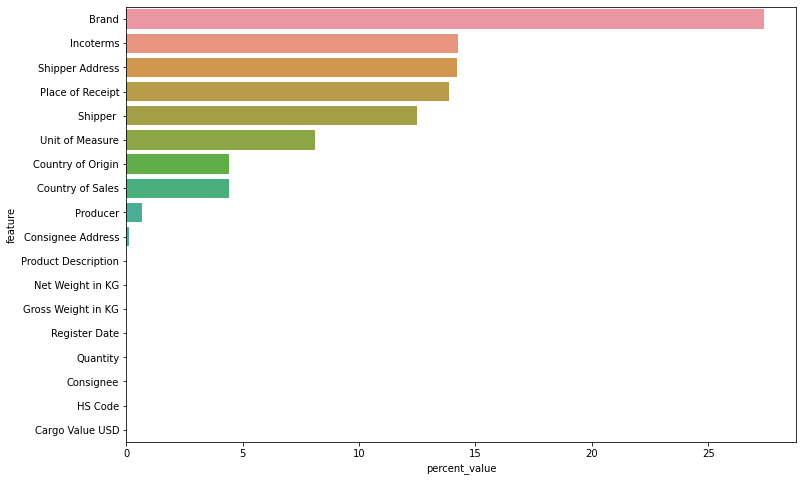

In [65]:
plt.figure(figsize=(12,8))
sns.barplot(x = 'percent_value',y='feature',data = df_null.sort_values(by=['percent_value'],ascending = False),orient= 'h')

In [67]:
df_all.fillna(value='uknown',inplace=True)

In [423]:
df_all['year'] = df_all['Register Date'].dt.year

In [424]:
df_all.to_csv('all_hscode_car.csv',index=False)

In [53]:
df_list_engine = pd.read_excel('Engine Model _1025.xlsx')

In [27]:
df_list_model = pd.read_csv('list_brand_model.csv',index_col=0)

In [9]:
for brand in list_brand:
    globals()[f'df_{brand.lower()}']  = df_list_engine[df_list_engine['メーカー']  == brand]
    globals()[f'list_{brand.lower()}']  = list(globals()[f'df_{brand.lower()}']['型式'].unique())
    globals()[f'list_{brand.lower()}']   = list(map(lambda x: x.split('-')[0],globals()[f'list_{brand.lower()}'] ))
    globals()[f'list_{brand.lower()}']   = list(set(globals()[f'list_{brand.lower()}'] ))

In [30]:
for brand in list_brand:
    globals()[f'list_model_{brand.lower()}']  = list(df_list_model[df_list_model['brand']  == brand]['model_car'])

In [437]:
for brand in list_brand:
    globals()[f'df_extract_em_{brand.lower()}'] = df_all_list_engine[df_all_list_engine.Producer.str.contains(brand)]

In [429]:
for brand in list_brand:
     globals()[f'df_all_{brand.lower()}']  = df_all[df_all['Producer'].str.contains(brand)]
     globals()[f'df_all_{brand.lower()}']['list_extract_model'] = globals()[f'df_all_{brand.lower()}']['Product Description'].map(lambda x: extract_engine_data(x,globals()[f'list_model_{brand.lower()}']))
     globals()[f'df_all_{brand.lower()}']['list_extract_engine'] = globals()[f'df_all_{brand.lower()}']['Product Description'].map(lambda x: extract_engine_data(x,globals()[f'list_{brand.lower()}']))
     globals()[f'df_all_{brand.lower()}']['count_extract_model'] = globals()[f'df_all_{brand.lower()}']['list_extract_model'].map(lambda x: len(x))
     globals()[f'df_all_{brand.lower()}']['count_extract_engine'] = globals()[f'df_all_{brand.lower()}']['list_extract_engine'].map(lambda x: len(x))
     globals()[f'df_all_{brand.lower()}']['count_set_extract_model'] = globals()[f'df_all_{brand.lower()}']['list_extract_model'].map(lambda x: len(set(x)))
     globals()[f'df_all_{brand.lower()}']['count_set_extract_engine'] = globals()[f'df_all_{brand.lower()}']['list_extract_engine'].map(lambda x: len(set(x)))

In [432]:
for brand in list_brand:
   globals()[f'df_all_{brand.lower()}'].to_csv(f'df_all_{brand.lower()}.csv',index=False)

In [ ]:
df_all_ZRT260 = df_all_toyota[df_all_toyota.apply(lambda x:'ZRT260' in x['list_extract_model'],axis = 1) & (df_all_toyota.len_extract_engine >0)]

In [320]:
df_all_ZRT260['year'] = df_all_ZRT260['Register Date'].dt.year
df_all_ZRT260_group_year = df_all_ZRT260.groupby(['year'])['len_extract_model'].sum().reset_index()
df_all_ZRT260_group_year

,year,len_extract_model
0,2011,131
1,2012,339
2,2013,146
3,2014,257
4,2015,87
5,2016,71
6,2017,58
7,2019,2


In [411]:
df_all_ZVW30 = df_all_toyota[df_all_toyota.apply(lambda x:'ZVW30' in x['list_extract_model'],axis = 1) & (df_all_toyota.len_extract_engine >0)]

In [412]:
df_all_ZVW30['year'] = df_all_ZVW30['Register Date'].dt.year
df_all_ZVW30_group_year = df_all_ZVW30.groupby(['year'])['len_extract_model'].sum().reset_index()
df_all_ZVW30_group_year

,year,len_extract_model
0,2011,14
1,2012,72
2,2013,17
3,2014,44
4,2015,218
5,2016,1096
6,2017,4


In [104]:
x = Counter(list_extract_model)
df_counter_model = pd.DataFrame.from_dict(x,orient='index').reset_index().rename(columns={'index':'model',0:'count'})
df_counter_model = df_counter_model.sort_values(by=['count'],ascending=False)
df_counter_model['percent_value'] = round(df_counter_model['count']/df_counter_model['count'].sum()*100,3)
df_counter_model

,model,count,percent_value
83,ZRT260,5005,12.574
61,ZVW30,4999,12.559
93,ZNE10,3264,8.200
86,ZRR75,2522,6.336
68,ZGE20,2083,5.233
...,...,...,...
152,AE104,1,0.003
154,AE115,1,0.003
155,GX105,1,0.003
157,JZX110,1,0.003


In [405]:
y = dict(x.most_common(3))
list(y.keys())

['ZRT260', 'ZVW30', 'ZNE10']

<AxesSubplot:xlabel='percent_value', ylabel='model'>

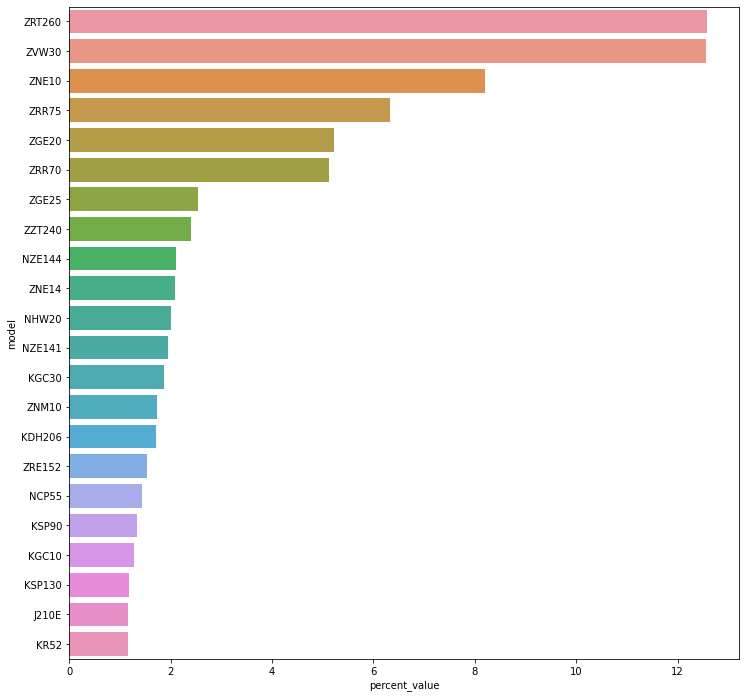

In [410]:
plt.figure(figsize=(12,12))
sns.barplot(x = 'percent_value',y='model',data = df_counter_model[df_counter_model['percent_value'] > 1],orient= 'h')

In [92]:
df_all_toyota['len_extract_model'] = df_all_toyota.list_extract_model.map(lambda x: len(x))
df_all_toyota['len_extract_engine'] = df_all_toyota.list_extract_engine.map(lambda x: len(x))
df_all_toyota['len_set_extract_model'] = df_all_toyota.list_extract_model.map(lambda x: len(set(x)))
df_all_toyota['len_set_extract_engine'] = df_all_toyota.list_extract_engine.map(lambda x: len(set(x)))

<ipython-input-92-ee44c97f59c4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_toyota['len_extract_model'] = df_all_toyota.list_extract_model.map(lambda x: len(x))
<ipython-input-92-ee44c97f59c4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_toyota['len_extract_engine'] = df_all_toyota.list_extract_engine.map(lambda x: len(x))
<ipython-input-92-ee44c97f59c4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [90]:
df_all_toyota[(df_all_toyota.len_extract_model >0)&(df_all_toyota.len_extract_engine >0)]

,Register Date,HS Code,Product Description,Producer,Brand,Place of Receipt,Country of Origin,Country of Sales,Shipper,Shipper Address,...,Quantity,Unit of Measure,Incoterms,Gross Weight in KG,Net Weight in KG,Cargo Value USD,list_extract_model,list_extract_engine,len_extract_model,len_extract_engine
530,2011-01-28,8703211090,"ЛЕГКОВОЙ АВТОМОБИЛЬ Б/У, МОДЕЛЬ: TOYOTA PASSO ...",TOYOTA ЯПОНИЯ,TOYOTA PASSO,uknown,"JP, JPN, Japan","CT, , Taiwan","СПМ КО.,ЛТД","ЯПОНИЯ ФУКУОКА-СИТИ 2-20 МИДОРИГАОКА, ХИГАШИКУ",...,1.0,ШТ,uknown,900.0,900.0,3995.0,[KGC10],[1KR],1,1
531,2011-01-31,8703211090,"ЛЕГКОВОЙ АВТОМОБИЛЬ, Б/У, МОДЕЛЬ: TOYOTA PASSO...",TOYOTA ЯПОНИЯ,TOYOTA PASSO,uknown,"JP, JPN, Japan","CT, , Taiwan","СПМ КО.,ЛТД","ЯПОНИЯ ФУКУОКА-СИТИ 2-20 МИДОРИГАОКА, ХИГАШИКУ",...,1.0,ШТ,uknown,910.0,910.0,4050.0,[KGC30],[1KR],1,1
532,2011-01-31,8703211090,"ЛЕГКОВОЙ АВТОМОБИЛЬ, Б/У, МОДЕЛЬ: TOYOTA PASSO...",TOYOTA ЯПОНИЯ,TOYOTA PASSO,uknown,"JP, JPN, Japan","CT, , Taiwan","СПМ КО.,ЛТД","ЯПОНИЯ ФУКУОКА-СИТИ 2-20 МИДОРИГАОКА, ХИГАШИКУ",...,1.0,ШТ,uknown,910.0,910.0,4050.0,[KGC30],[1KR],1,1
657,2011-02-07,8703211090,"ЛЕГКОВОЙ АВТОМОБИЛЬ, Б/У, МОДЕЛЬ: TOYOTA PASSO...","TOYOTA ЯПОНИЯ, TOYOTA PASSO",TOYOTA PASSO,uknown,"JP, JPN, Japan","CT, , Taiwan","МВ-ЛАЙН КО.,ЛТД.","ЯПОНИЯ, ПРЕФЕКТУРА КИОТО МАЙДЗУРУ 22-3, АЗА-КИТА",...,1.0,ШТ,uknown,910.0,910.0,2150.0,[KGC30],[1KR],1,1
772,2011-02-04,8703211090,"А/М ЛЕГКОВОЙ,Б/У,TOYOTA PASSO,ГОД ВЫП.: 2010.0...",TOYOTA,TOYOTA,ВЛАДИВОСТОК,"JP, JPN, Japan","CT, , Taiwan",TAU CORPORATION,"JP JAPAN SAITAMA LAND AXIS TOWER 10F, 11-2 SHI...",...,1.0,ШТ,CFR,930.0,930.0,2486.0,[KGC15],[1KR],1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451412,2019-11-01,8703239082,"А/М Б/У TOYOTA VOXY, ЛЕГКОВОЙ, МОМЕНТ ВЫП. 15....",TOYOTA MOTOR CORP.,TOYOTA,ВЛАДИВОСТОК,JAPAN,JAPAN,MW-LINE CO.LTD,"624-0945, KYOTO-FU, MAIZURU-SHI, 1105-47 AZA-KITA",...,0.0,uknown,CFR,1690.0,1690.0,4800.0,[ZRR75],[3ZR],1,1
5470574,2019-12-01,8703239042,"АВТОМОБИЛЬ ЛЕГКОВОЙ Б/У, TOYOTA WISH, МЕСТ 7, ...",TOYOTA MOTOR CORPORATION,TOYOTA,ВЛАДИВОСТОК,"JP, JPN, Japan","JP, JPN, Japan",BIZUPON CO. LTD,"TSUZUKI-KU, NAKAGAWA, 1-4-6, NAKAGAWA CHUO",...,0.0,uknown,CFR,1450.0,1450.0,4800.0,[ZGE25],[2ZR],1,1
5470927,2019-12-01,8703239082,"А/М Б/У TOYOTA REGIUS ACE, ГРУЗОПАССАЖИРСКИЙ, ...",TOYOTA MOTOR CORP.,TOYOTA,ВЛАДИВОСТОК,"JP, JPN, Japan","JP, JPN, Japan",MW-LINE CO.LTD,"624-0945, KYOTO-FU, MAIZURU-SHI, 1105-47 AZA-KITA",...,0.0,uknown,CFR,1790.0,1790.0,4800.0,[TRH200],[1TR],1,1
5472031,2019-12-01,8703239082,"А/М Б/У ЛЕГКОВОЙ TOYOTA VOXY, МОМЕНТ ВЫП.: 201...",TOYOTA,TOYOTA,ВЛАДИВОСТОК,"JP, JPN, Japan","JP, JPN, Japan",AKSYS CO. LTD.,"TOYAMA KEN, IMIZU SHI SHICHIMI NAKANO 200",...,0.0,uknown,CFR,1600.0,1600.0,4800.0,[ZRR70],[3ZR],1,1


In [93]:
df_all_toyota[(df_all_toyota.len_set_extract_model >1)]

,Register Date,HS Code,Product Description,Producer,Brand,Place of Receipt,Country of Origin,Country of Sales,Shipper,Shipper Address,...,Incoterms,Gross Weight in KG,Net Weight in KG,Cargo Value USD,list_extract_model,list_extract_engine,len_extract_model,len_extract_engine,len_set_extract_model,len_set_extract_engine


In [94]:
df_all_toyota.to_csv('df_all_toyota.csv',index = False)

In [109]:
# df_all_toyota.list_extract_model = df_all_toyota.list_extract_model.map(tuple)
df_all_toyota.list_extract_engine = df_all_toyota.list_extract_engine.map(list)

In [116]:
df_group_model = df_all_toyota.groupby(['list_extract_model'])['list_extract_engine'].sum().reset_index()
df_group_model['list_extract_model'] = df_group_model['list_extract_model'].map(lambda x : set(x))
df_group_model['list_extract_model'] = df_group_model['list_extract_model'].map(lambda x : ''.join(x))

In [117]:
df_group_model

,list_extract_model,list_extract_engine
0,,"[1KR, 1KR, 1KR, 1KR, 1KR, 1KR, 1KR, 1KR, 1KR, ..."
1,ACA21,"[1AZ, 1AZ, 1AZ]"
2,ACA31,"[2AZ, 2AZ, 2AZ, 2AZ, 2AZ, 2AZ, 2AZ, 2AZ, 2AZ]"
3,ACA33,"[2AZ, 2AZ, 2AZ, 2AZ, 2AZ, 2AZ, 2AZ, 2AZ, 2AZ, ..."
4,ACA38,[]
...,...,...
182,ZZT240,"[1ZZ, 1ZZ, 1ZZ, 1ZZ, 1ZZ, 1ZZ, 1ZZ, 1ZZ, 1ZZ, ..."
183,ZZT241,"[1ZZ, 1ZZ, 1ZZ, 1ZZ, 1ZZ, 1ZZ, 1ZZ, 1ZZ, 1ZZ, ..."
184,ZZT245,"[1ZZ, 1ZZ, 1ZZ, 1ZZ, 1ZZ, 1ZZ, 1ZZ, 1ZZ, 1ZZ, ..."
185,ZZV50,[]


In [ ]:
83	ZRT260	5005	12.574
61	ZVW30	4999	12.559
93	ZNE10	3264	8.200

In [118]:
df_group_best_model = df_group_model[(df_group_model.list_extract_model == 'ZRT260') | (df_group_model.list_extract_model == 'ZVW30') | (df_group_model.list_extract_model == 'ZNE10')]

In [119]:
df_group_best_model

,list_extract_model,list_extract_engine
161,ZNE10,"[1ZZ, 1ZZ, 1ZZ, 1ZZ, 1ZZ, 1ZZ, 1ZZ, 1ZZ, 1ZZ, ..."
169,ZRT260,"[2ZR, 2ZR, 2ZR, 2ZR, 2ZR, 2ZR, 2ZR, 2ZR, 2ZR, ..."
171,ZVW30,"[2ZR, 2ZR, 2ZR, 2ZR, 2ZR, 2ZR, 2ZR, 2ZR, 2ZR, ..."


In [133]:
list_best_model = ['ZNE10','ZRT260','ZVW30']

for model in list_best_model:
    globals()[f'df_{model}'] = df_group_best_model[df_group_best_model['list_extract_model'] == model]
    globals()[f'list_engine_model_{model}'] = list(globals()[f'df_{model}']['list_extract_engine'])

In [409]:
ls = list(to_1D(list_engine_model_ZNE10))
z = list(dict(Counter(ls).most_common(3)).keys())
z

['1ZZ']

In [137]:
def to_1D(series):
 return pd.Series([x for _list in series for x in _list])

In [149]:
for model in list_best_model:
  print(model)
  print(to_1D(globals()[f'df_{model}']['list_extract_engine']).value_counts())
  print("######################")

ZNE10
1ZZ    673
dtype: int64
######################
ZRT260
2ZR    1093
dtype: int64
######################
ZVW30
2ZR    1465
dtype: int64
######################


In [304]:
def intersection(a, b):
    v = np.subtract(b[1],a[0]).round(decimals=3)
    return v

-3


In [312]:
df_all_list_engine = pd.read_csv('list_all_em_GTO.csv',index_col=0,parse_dates=['Register Date'])
df_all_list_engine

,Register Date,HS Code,Product Description,Producer,Brand,Place of Receipt,Country of Origin,Country of Sales,Shipper,Shipper Address,Consignee,Consignee Address,Quantity,Unit of Measure,Incoterms,Gross Weight in KG,Net Weight in KG,Cargo Value USD
0,2011-01-29,8407349908,СИЛОВОЙ АГРЕГАТ TOYOTA 2TR-FE-261 В РАЗОБРАННО...,TOYOTA TSUSHO CORPORATION,ОТСУТСТВУЕТ,КОТКА,"JP, JPN, Japan","JP, JPN, Japan",TOYOTA TSUSHO CORPORATION,"450-8575 NAKAMURA-KU NAGOYA 9-8,MEIEKI 4-CHOME",ООО ТЕХНОСЕРВИСПРОМ,"603104, НИЖЕГОРОДСКАЯ ОБЛ, Н.НОВГОРОД, НАРТОВА...",15,ШТ,CIF,3604.00,3017.0,73063.36
1,2011-01-29,8407349908,СИЛОВОЙ АГРЕГАТ TOYOTA 2TR-FE-A343E-111 В РАЗО...,TOYOTA TSUSHO CORPORATION,ОТСУТСТВУЕТ,КОТКА,"JP, JPN, Japan","JP, JPN, Japan",TOYOTA TSUSHO CORPORATION,"450-8575 NAKAMURA-KU NAGOYA 9-8,MEIEKI 4-CHOME",ООО ТЕХНОСЕРВИСПРОМ,"603104, НИЖЕГОРОДСКАЯ ОБЛ, Н.НОВГОРОД, НАРТОВА...",5,ШТ,CIF,1765.00,1465.0,37014.64
2,2011-01-17,8407343009,"ДВИГАТЕЛЬ ЗИЛ ,Б/У,БЕНЗИНОВЫЙ,ОБЪЕМ 6000СМ.КУБ...",АМО ЗИЛ,ЗИЛ,ЕКАТЕРИНБУРГ,"RU, RUS, Russia","UA, UKR, Ukraine",ООО ПЕТРУС,"Г.ДРОГОБЫЧ УЛ.ГАЙДАМАЦКАЯ, 7/1",ЗАО АВТОМОБИЛИ И МОТОРЫ УРАЛА,"624130, СВЕРДЛОВСКАЯ ОБЛ., Г.НОВОУРАЛЬСК, УЛ.А...",30,ШТ,CPT,14400.00,14400.0,27000.00
3,2011-01-17,8407343009,"ДВИГАТЕЛЬ ЗИЛ ,Б/У,НЕКОМПЛЕКТНЫЙ,БЕНЗИНОВЫЙ,ОБ...",АМО ЗИЛ,ЗИЛ,ЕКАТЕРИНБУРГ,"RU, RUS, Russia","UA, UKR, Ukraine",ООО ПЕТРУС,"Г.ДРОГОБЫЧ УЛ.ГАЙДАМАЦКАЯ, 7/1",ЗАО АВТОМОБИЛИ И МОТОРЫ УРАЛА,"624130, СВЕРДЛОВСКАЯ ОБЛ., Г.НОВОУРАЛЬСК, УЛ.А...",15,ШТ,CPT,3000.00,3000.0,6894.50
4,2011-01-20,8407343009,ДВИГАТЕЛИ БЕНЗИНОВЫЕ В СБОРЕ С КОРОБКОЙ ПЕРЕДА...,MERCEDES - BENZ,MERCEDES - BENZ,ТОЯМА НЬЮ ПОРТ,"JP, JPN, Japan","JP, JPN, Japan","METAL AUTO HOKURIKU CO., LTD","ISHIKAWA KEN KOMATSU SHI SHIRAE MACHI, RO 62",ИП КОЧЕТКОВ ВЯЧЕСЛАВ ВИКТОРОВИЧ,"664019, , Г ИРКУТСК, ПЕР. МИНУСИНСКИЙ Д 10",38,ШТ,FOB,6460.00,6460.0,6536.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259191,2019-12-01,8407349908,"ДВИГАТЕЛЬ БЕНЗИНОВЫЕ В СБОРЕ, НОВЫЙ.ПРЕДНАЗНАЧ...",HYUNDAI MOTOR MANUFACTURING CZECH S.R.O,HYUNDAI,КАЛИНИНГРАД,"CZ, CZE, Czech Repoublic","CZ, CZE, Czech Repoublic",HYUNDAI MOTOR MANUFACTURING CZECH S.R.O,"73951, CZECH, NIZNI LHOTY, PRUMYSLOVA ZONA NOS...",ООО НОВИК РЭЙЛ,"238151, КАЛИНИНГРАДСКАЯ ОБЛАСТЬ, ГОРОД ЧЕРНЯХО...",0,unknown,DAP,12190.88,11990.0,188344.84
259192,2019-12-01,8407349908,"ДВИГАТЕЛИ БЕНЗИНОВ., НОВЫЕ,ПРЕДНАЗНАЧЕННЫЕ ДЛЯ...",KIA MOTORS SLOVAKIA.S.R.O.,KIA,КАЛИНИНГРАД,"SK, SVK, Slovakia","SK, SVK, Slovakia",CARMEL LOGISTICS S.R.O.,"01009, ZILINA -BYTCICA, NA STANICU 22",ООО НОВИК РЭЙЛ,"238151, КАЛИНИНГРАДСКАЯ ОБЛАСТЬ, ГОРОД ЧЕРНЯХО...",0,unknown,DAP,24990.00,24990.0,149953.11
259193,2019-12-01,8407349908,"ДВИГАТЕЛЬ БЕНЗИНОВЫЙ, НОВЫЙ,ПРЕДНАЗНАЧЕННЫЕ ДЛ...",KIA MOTORS SLOVAKIA.S.R.O.,KIA,КАЛИНИНГРАД,"SK, SVK, Slovakia","SK, SVK, Slovakia",CARMEL LOGISTICS S.R.O.,"01009, ZILINA -BYTCICA, NA STANICU 22",ООО НОВИК РЭЙЛ,"238151, КАЛИНИНГРАДСКАЯ ОБЛАСТЬ, ГОРОД ЧЕРНЯХО...",0,unknown,DAP,210.00,210.0,1260.11
259194,2019-12-01,8407349908,"ДВИГАТЕЛИ БЕНЗИНОВ., НОВЫЕ,ПРЕДНАЗНАЧЕННЫЕ ДЛЯ...",KIA MOTORS SLOVAKIA.S.R.O.,KIA,КАЛИНИНГРАД,"SK, SVK, Slovakia","SK, SVK, Slovakia",CARMEL LOGISTICS S.R.O.,"01009, ZILINA -BYTCICA, NA STANICU 22",ООО НОВИК РЭЙЛ,"238151, КАЛИНИНГРАДСКАЯ ОБЛАСТЬ, ГОРОД ЧЕРНЯХО...",0,unknown,DAP,18480.00,18480.0,110325.00


In [421]:
df_all_list_engine['year'] = df_all_list_engine['Register Date'].dt.year
df_all_list_engine.to_csv('all_hscode_engine.csv',index = False)

In [322]:
df_extract_em_toyota = df_all_list_engine[df_all_list_engine.Producer.str.contains('TOYOTA')]

In [327]:
df_extract_em_toyota['list_extract_engine'] = df_extract_em_toyota['Product Description'].map(lambda x:extract_specific_engine_data(x,'2ZR'))

In [328]:
df_extract_em_toyota['len_list_engine'] = df_extract_em_toyota['list_extract_engine'].map(lambda x : len(x))

In [331]:
df_extract_em_toyota['year']  = df_extract_em_toyota['Register Date'].dt.year

In [372]:
df_group_2ZR = df_extract_em_toyota.groupby(['year'])['len_list_engine'].sum().reset_index()
df_group_2ZR

,year,len_list_engine
0,2011,3
1,2012,14
2,2013,21
3,2014,27
4,2015,26
5,2016,18
6,2017,23
7,2018,24
8,2019,290


In [373]:
df_merge = df_all_ZRT260_group_year.merge(df_group_2ZR,on = 'year',how='outer')

In [374]:
df_merge

,year,len_extract_model,len_list_engine
0,2011,131.0,3
1,2012,339.0,14
2,2013,146.0,21
3,2014,257.0,27
4,2015,87.0,26
5,2016,71.0,18
6,2017,58.0,23
7,2019,2.0,290
8,2018,NaN,24


In [377]:
df_merge = df_merge.sort_values(by=['year'])
df_merge.fillna(value=0,inplace=True)
df_merge.rename(columns={"len_extract_model":"count_model","len_extract_engine":"count_engine"})
df_merge.set_index('year',inplace=True)

In [385]:
df_merge.rename(columns={"len_extract_model":"count_model","len_list_engine":"count_engine"},inplace=True)


In [386]:
df_merge

,count_model,count_engine
year,,
2011,131.0,3
2012,339.0,14
2013,146.0,21
2014,257.0,27
2015,87.0,26
2016,71.0,18
2017,58.0,23
2018,0.0,24
2019,2.0,290


In [ ]:
df_merge

<Figure size 864x576 with 0 Axes>

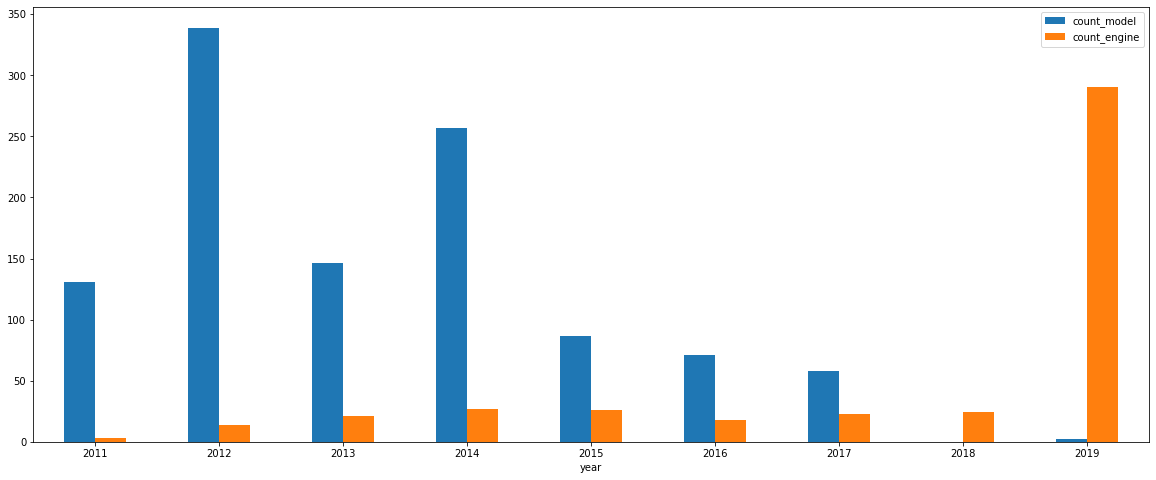

In [435]:
plt.figure(figsize=(12,8))
# sns.lineplot(data=df_merge)
ax = df_merge.plot.bar(figsize=(20,8),rot=0)

In [388]:
corr = df_merge.T.corr(method=correlation)

<AxesSubplot:title={'center':'TOYOTA - Model ZRT260 - Engine 2ZR Correlation'}, xlabel='year', ylabel='year'>

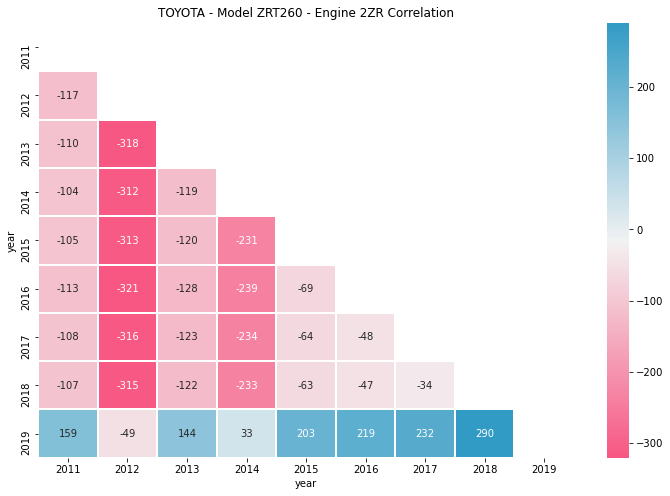

In [434]:
mask = np.triu(np.ones_like(corr, dtype=np.bool))
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
plt.figure(figsize=(12,8))
plt.title('TOYOTA' + ' - ' + 'Model ZRT260' + ' - ' + 'Engine 2ZR' + ' Correlation' )
sns.heatmap(corr, mask=mask,cmap=cmap,linewidths=1,annot=True,fmt='g')

In [415]:
df_extract_em_toyota['list_extract_engine'] = df_extract_em_toyota['Product Description'].map(lambda x:extract_engine_data(x,list_toyota))

In [416]:
df_1ZZ  = df_extract_em_toyota[df_extract_em_toyota.apply(lambda x:'1ZZ' in x['list_extract_engine'],axis = 1)]

In [418]:
df_1ZZ['count_engine']  = df_1ZZ.list_extract_engine.map(lambda x : count_em('1ZZ',x))

In [419]:
df_group_1ZZ['year']  =

,Register Date,HS Code,Product Description,Producer,Brand,Place of Receipt,Country of Origin,Country of Sales,Shipper,Shipper Address,...,Quantity,Unit of Measure,Incoterms,Gross Weight in KG,Net Weight in KG,Cargo Value USD,list_extract_engine,len_list_engine,year,count_engine
34,2011-01-12,8407343009,ДВИГАТЕЛИ БЕНЗИНОВЫЕ С РАБОЧИМ ОБЪЁМОМ ДВИГАТЕ...,TOYOTA,HONDA,ВЛАДИВОСТОК,"JP, JPN, Japan","JP, JPN, Japan","JAPANTREK CO.,LTD","TOYAMA PREF. IMIZU-SHI 18-1,IMIZU-CHO 1 CHOME",...,21,ШТ,CFR,6825.00,6825.0,3780.00,"[1G, 1ZZ, 1ZZ, 5S]",0,2011,2
49,2011-01-14,8407343009,ДВИГАТЕЛЬ А/М Б/У БЕНЗИН С ОБЪЕМОМ БОЛЕЕ 1000С...,"TOYOTA,NISSAN,MMC,SUBARU,MAZDA,HONDA,SUZIKI","TOYOTA,NISSAN,MMC,SUBARU,MAZDA,HONDA,SUZIKI",ВЛАДИВОСТОК,"JP, JPN, Japan","JP, JPN, Japan",DOMITORI SHOKAI INC.,"HOKKAIDO OTARU-CITY ZENIBAKO3-CHOME, 514-11",...,38,ШТ,CFR,5780.00,5780.0,3742.48,"[2NZ, 1ZZ, 1MZ]",0,2011,1
69,2011-01-17,8407343009,"ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ БЕНЗИНОВЫЕ, Б/У...",TOYOTA,TOYOTA,ВЛАДИВОСТОК,"JP, JPN, Japan","JP, JPN, Japan","KAIHO SANGYO CO.,LTD.",920-0209 ISHIKAWA KANAZAWA-SHI HIGASHIKAGATSUM...,...,22,ШТ,CFR,2955.00,2955.0,2293.62,"[2NZ, 4A, 4A, 4A, 5A, 1ZZ]",0,2011,1
911,2011-01-28,8407343009,"ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ БЕНЗИНОВЫЕ, Б/У...",TOYOTA,TOYOTA,ВЛАДИВОСТОК,"JP, JPN, Japan","JP, JPN, Japan",AL NABIL USED AUTO SPARE PARTS TR.L.L.C.,U.A.E. SHARJAH P.O.BOX:80024,...,18,ШТ,CFR,5874.00,5874.0,4409.00,"[1ZZ, 1AZ]",0,2011,1
975,2011-01-18,8407343009,ДВИГАТЕЛИ БЕНЗ.С НАВЕСНЫМ ОБОРУД.БЫВШ.В УПОТР....,"TOYOTA MOTOR CORP., NISSAN MOTOR COMP., MAZDA ...","TOYOTA, NISSAN, MAZDA, HONDA, MITSUBISHI",ВОСТОЧНЫЙ,"JP, JPN, Japan","JP, JPN, Japan",HASEGAWA MOTOR COMPANY LTD.,"1380 OKAKYOUDEN OUZU-SHI, TOYAMA PREF",...,16,ШТ,CFR,3520.00,3520.0,3460.00,"[2SZ, 4S, 1ZZ, 1NZ, 1NZ, 1NZ, 1AZ, 3S]",0,2011,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258391,2019-12-01,8407343009,"ЗАП.ЧАСТИ ДЛЯ АВТОМОБИЛЕЙ, Б/У: ДВИГАТЕЛИ БЫВШ...",TOYOTA,TOYOTA,ВЛАДИВОСТОК,"JP, JPN, Japan","JP, JPN, Japan",ROOTS CO. LTD,"KURIHARA-SHI, WAKAYANAGI, MIYAGI, AZA KAWAMINA...",...,0,unknown,CFR,230.00,230.0,346.49,[1ZZ],0,2019,1
258881,2019-12-01,8407343009,"ДВС А/М БЫВШИЙ В УПОТРЕБЛЕНИИ, В СБОРЕ С АКП, ...",TOYOTA,TOYOTA,ВЛАДИВОСТОК,"JP, JPN, Japan","SG, SGP, Singapore",BEYOND TRADING LIMITED,"SHANGHAI, 1412 GONGHEXIN ROAD 2449",...,0,unknown,CFR,1006.44,898.0,1355.98,"[1ZZ, 2GR]",0,2019,1
258937,2019-12-01,8407343009,ДВИГАТЕЛИ БЕНЗИНОВЫЕ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫ...,TOYOTA MOTOR CO. LTD,TOYOTA,ВЛАДИВОСТОК,"JP, JPN, Japan","JP, JPN, Japan",AL EXPORT,"875-1, KAMONOFU, SINGU, FUKUOKA PREF, KASUYA",...,0,unknown,CFR,210.00,210.0,317.10,[1ZZ],0,2019,1
259152,2019-12-01,8407343009,ЗАПАСНЫЕ ЧАСТИ ДЛЯ А/М БЫВШИЕ В УПОТРЕБЛЕНИИ: ...,TOYOTA MOTOR CO.,TOYOTA,ВЛАДИВОСТОК,"JP, JPN, Japan","JP, JPN, Japan",PIONEER COMPANY LTD.,"OSAKA, HIGASHI-OSAKA-CITY, 5-1-20",...,0,unknown,CFR,195.00,195.0,294.45,[1ZZ],0,2019,1


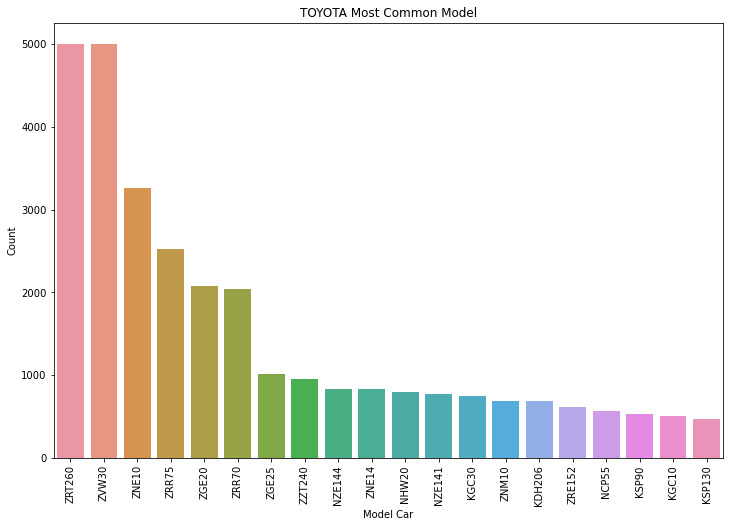

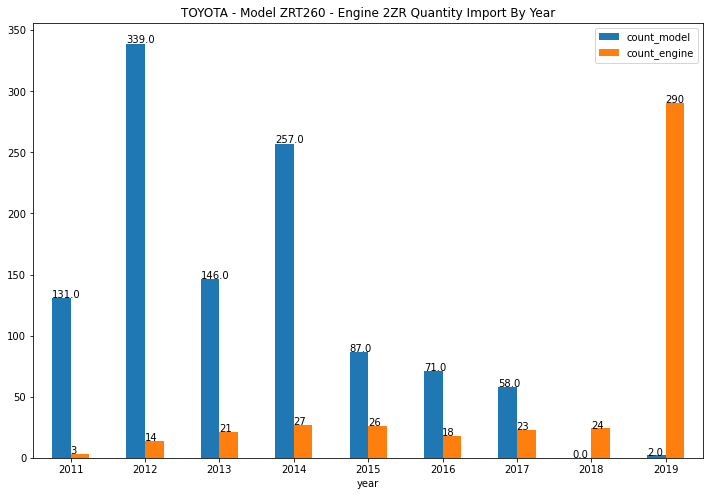

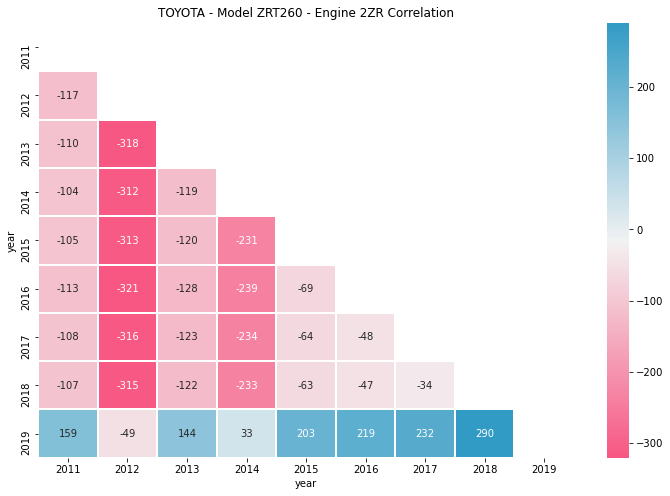

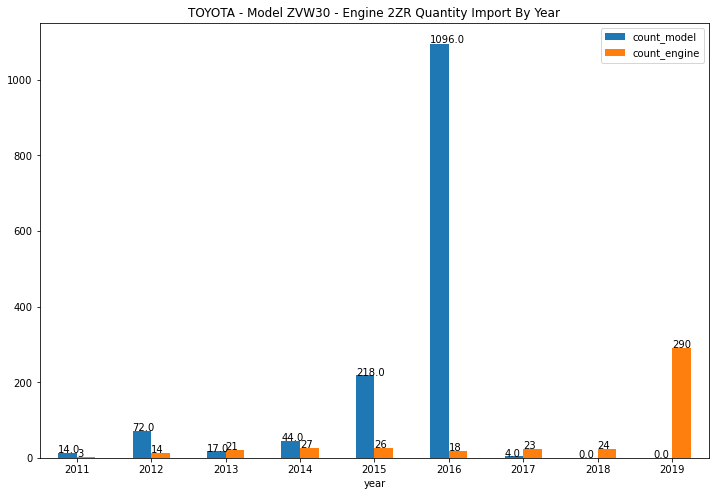

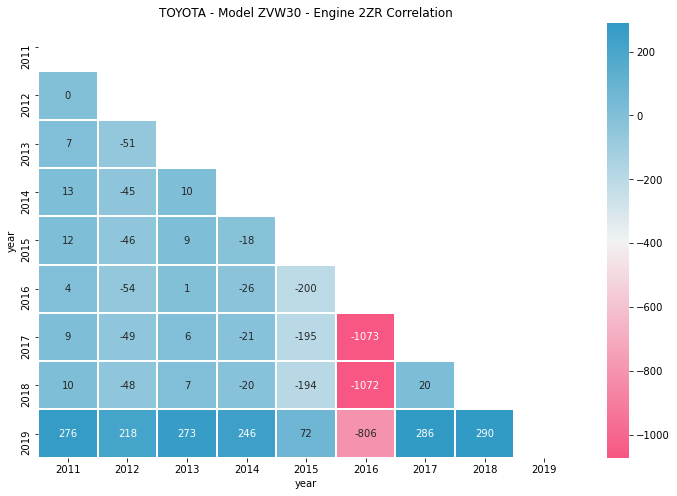

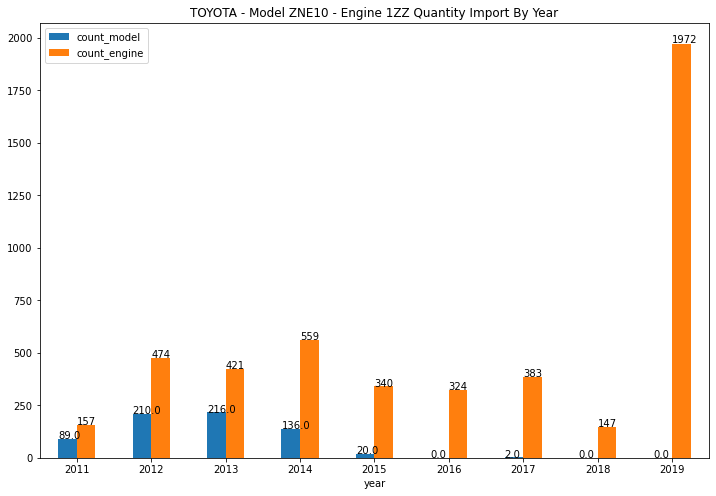

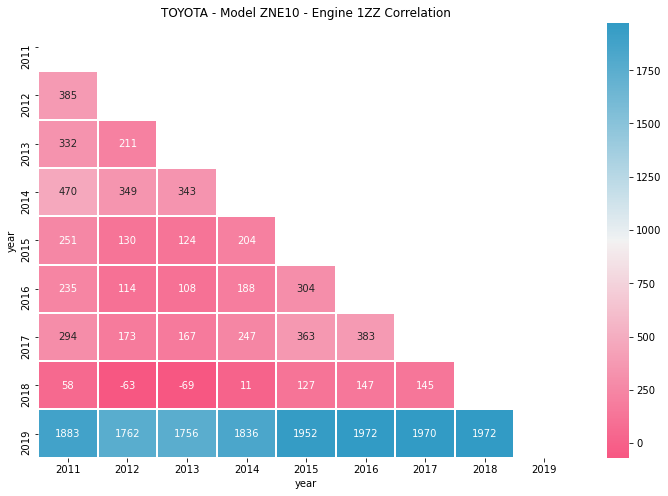

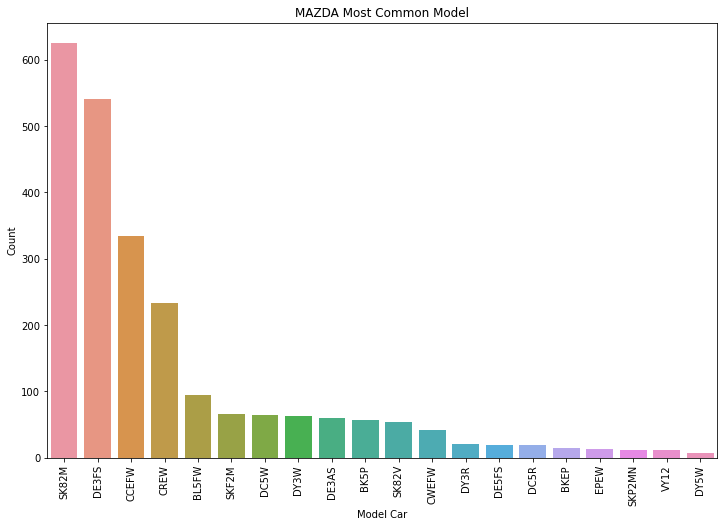

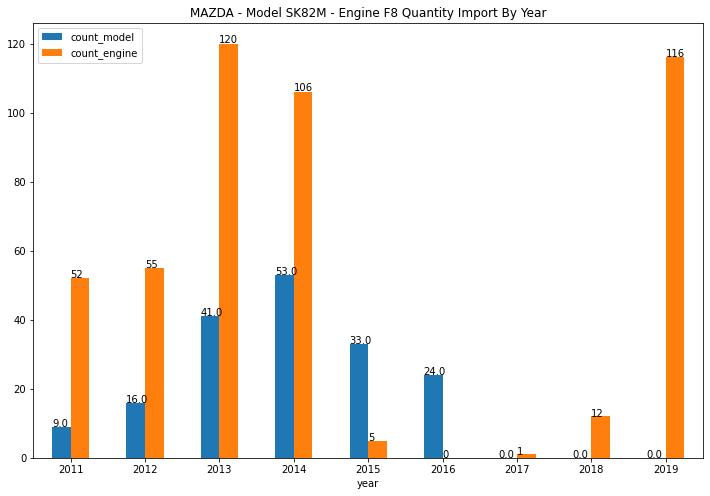

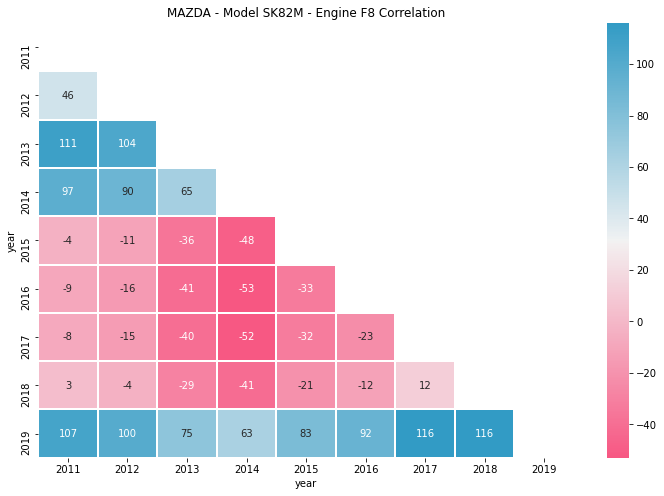

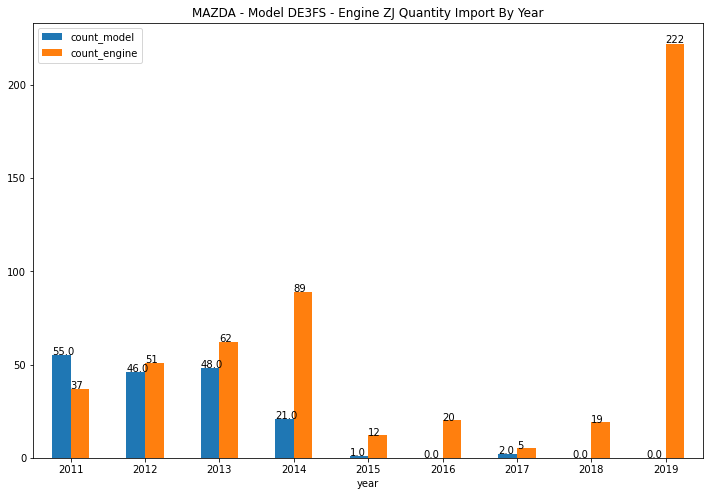

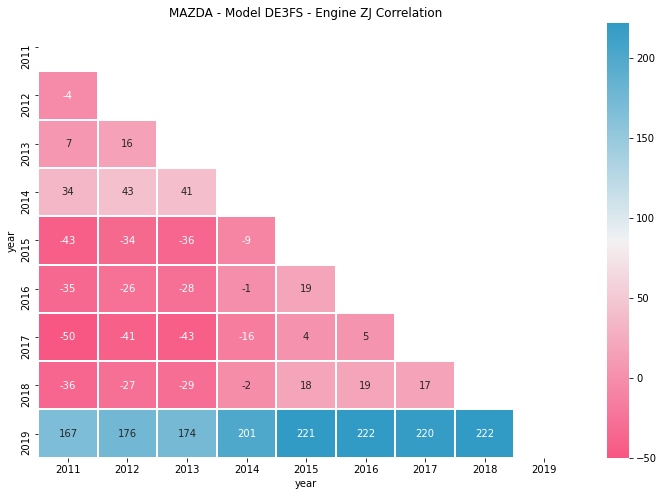

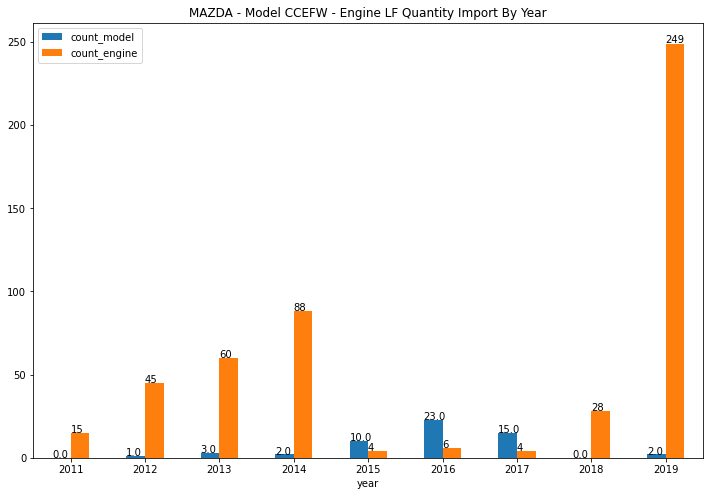

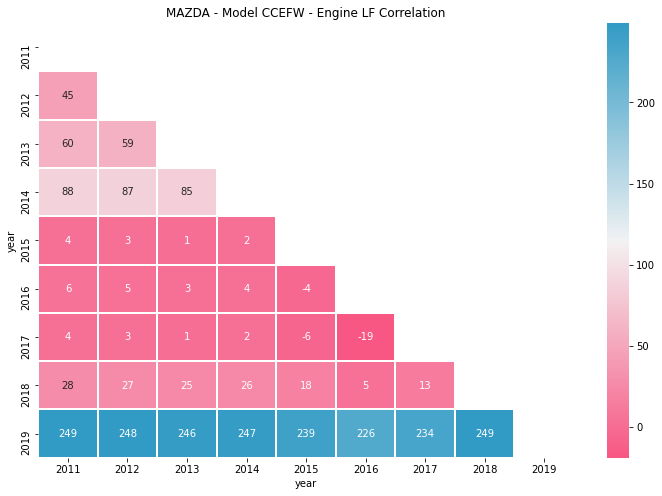

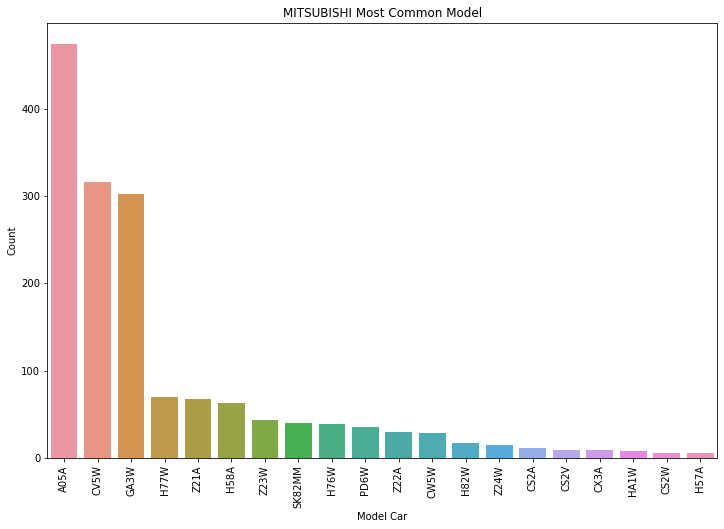

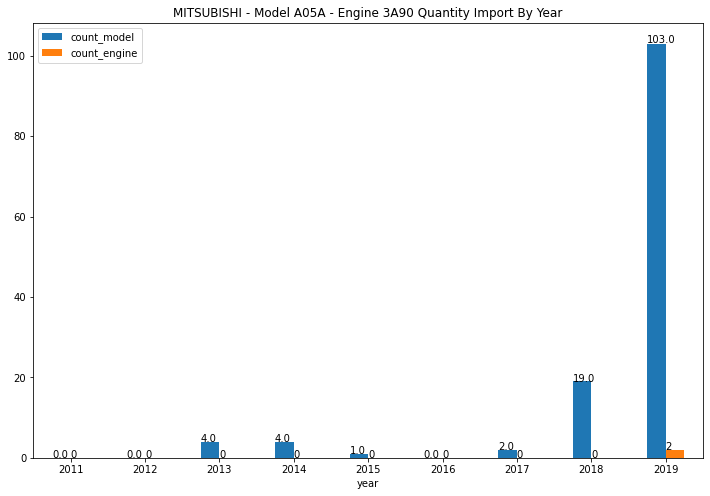

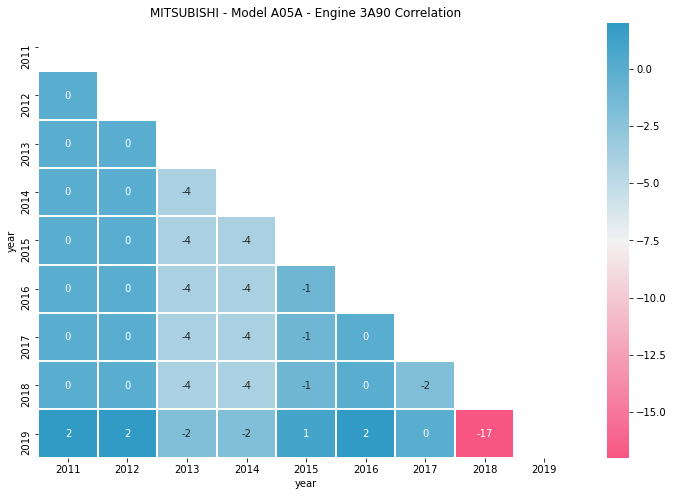

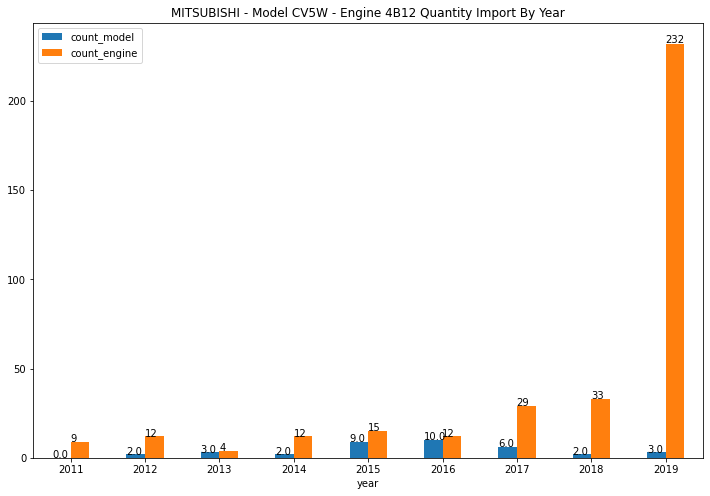

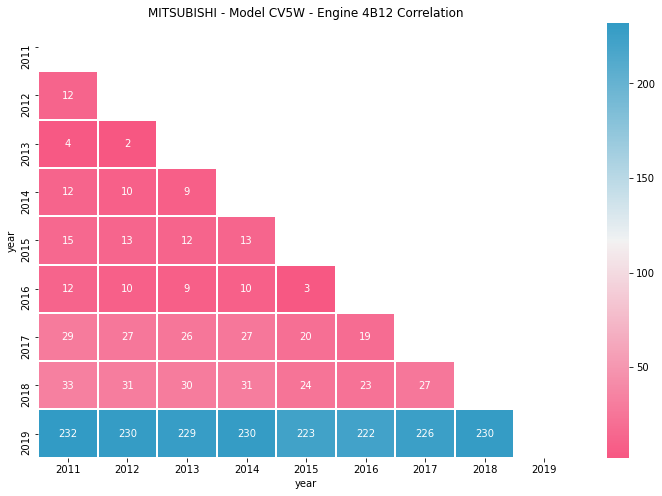

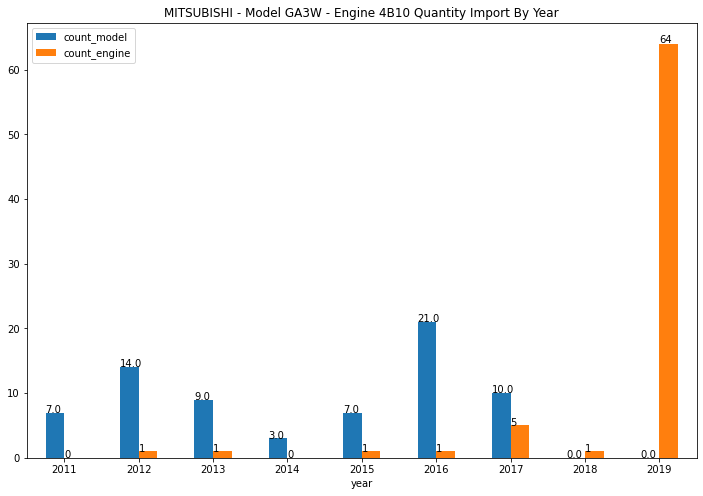

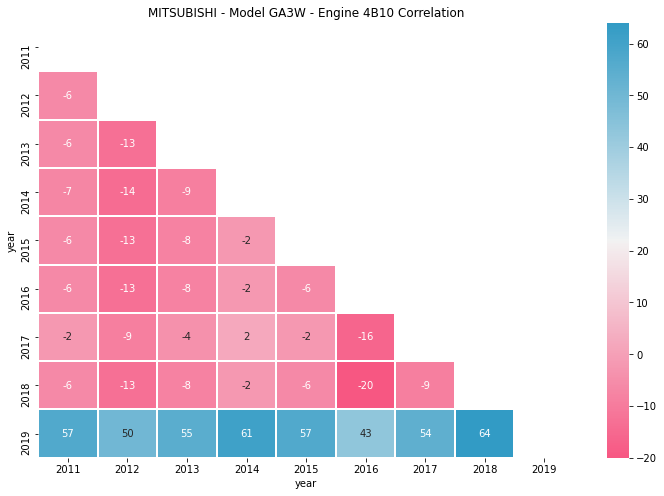

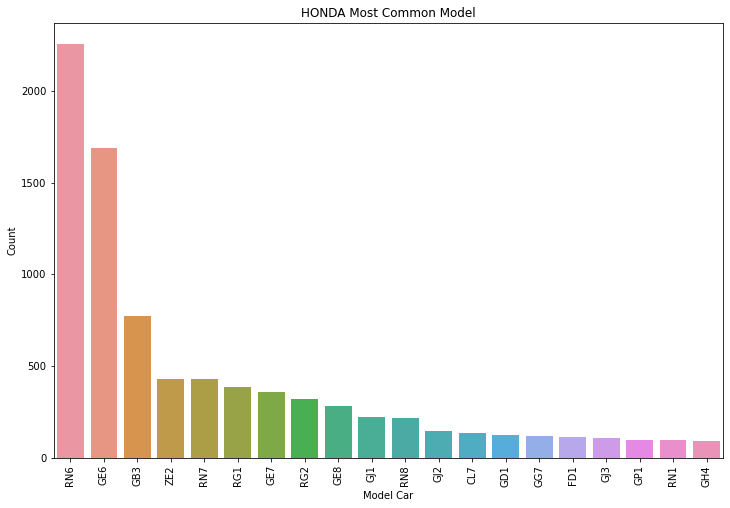

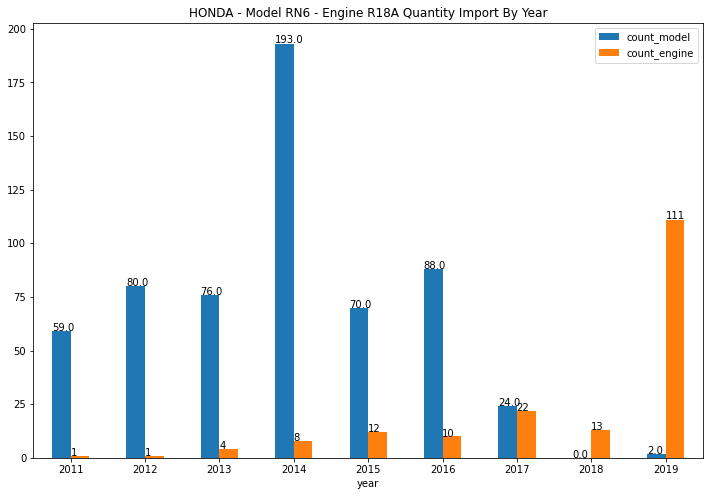

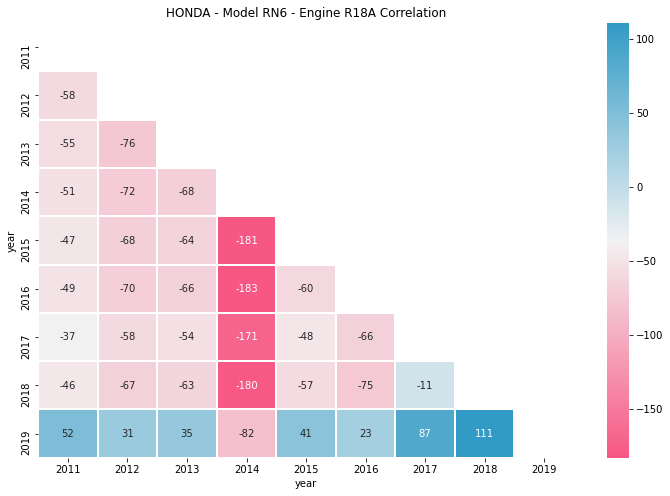

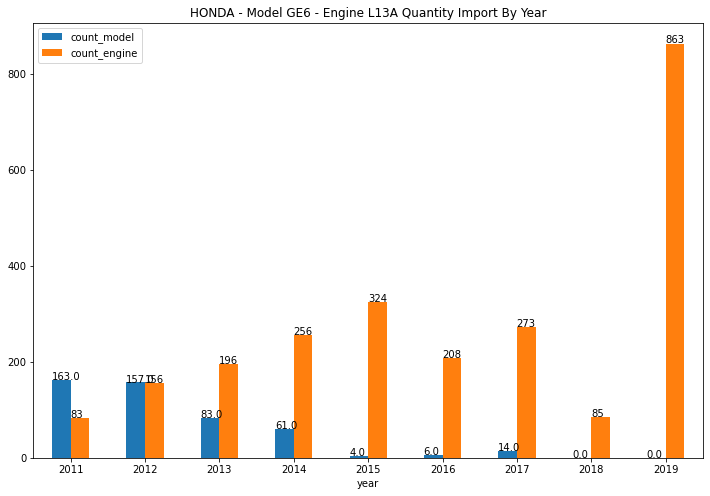

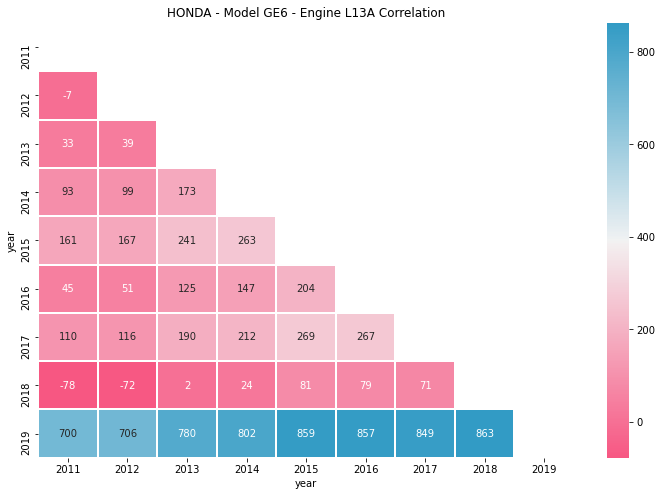

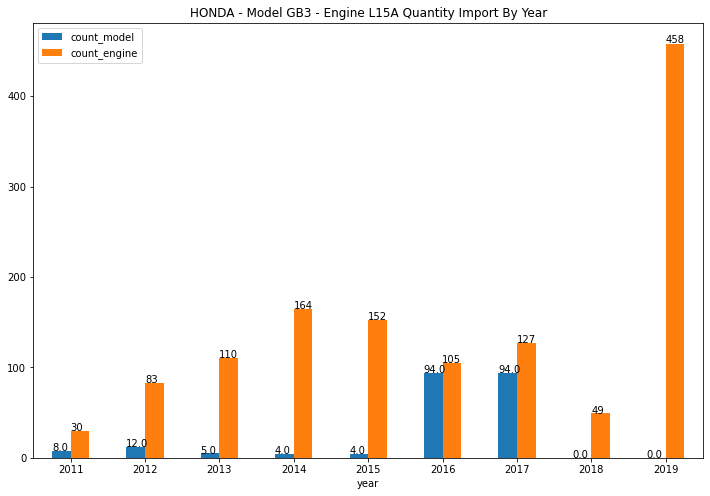

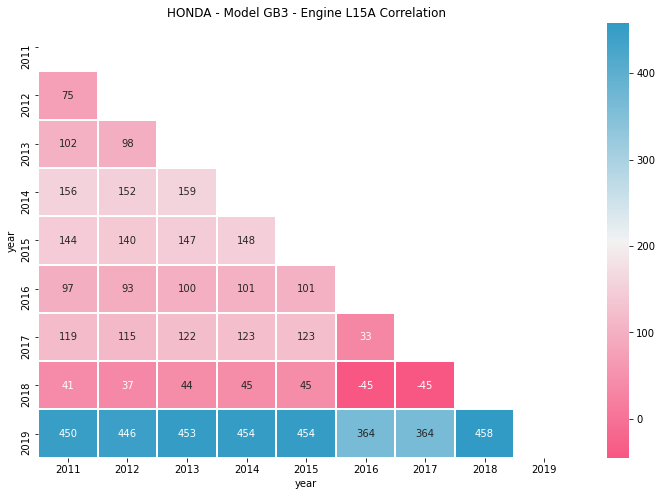

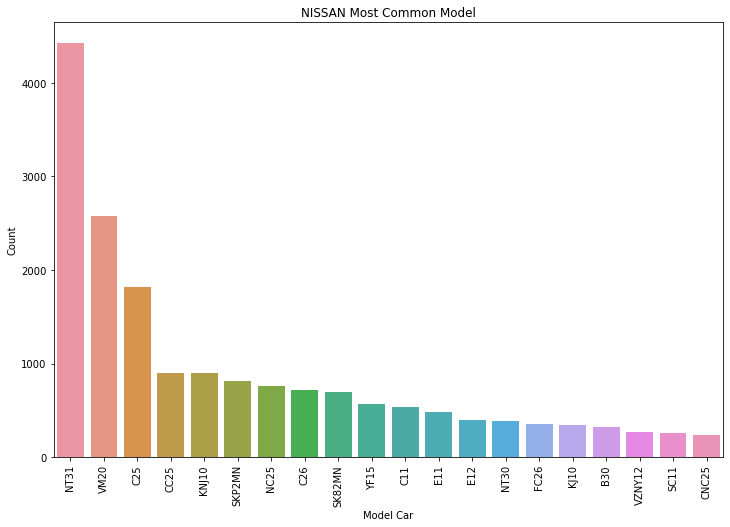

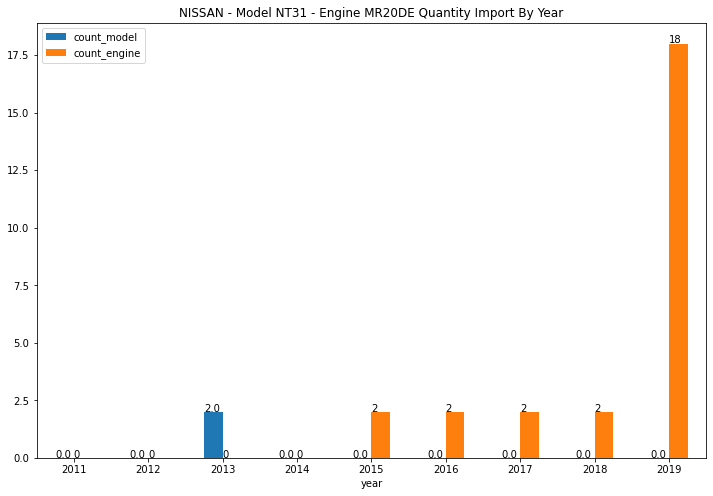

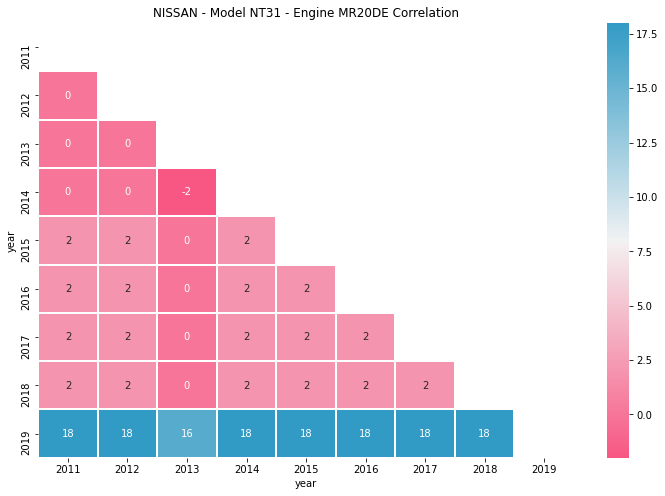

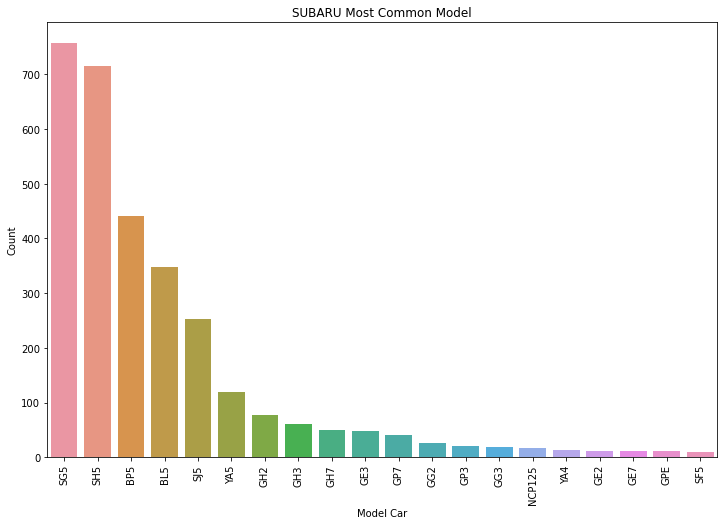

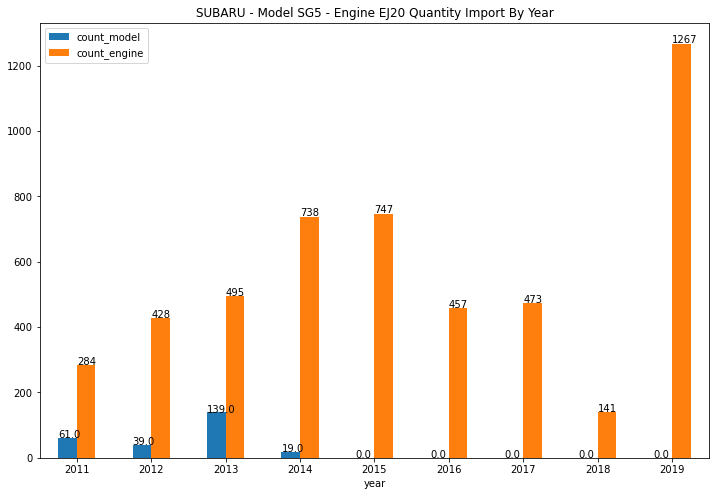

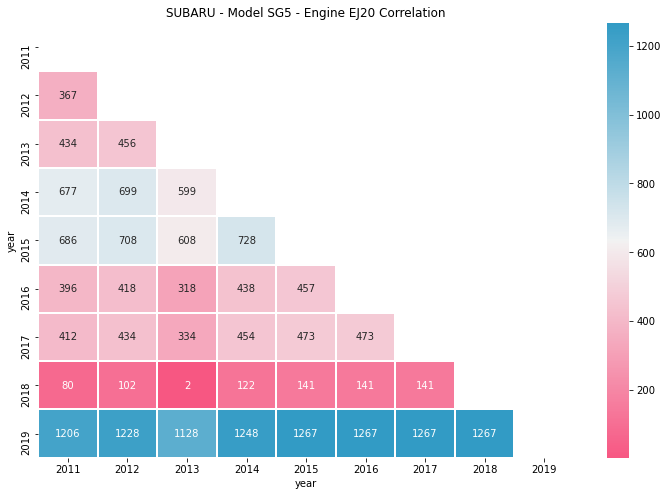

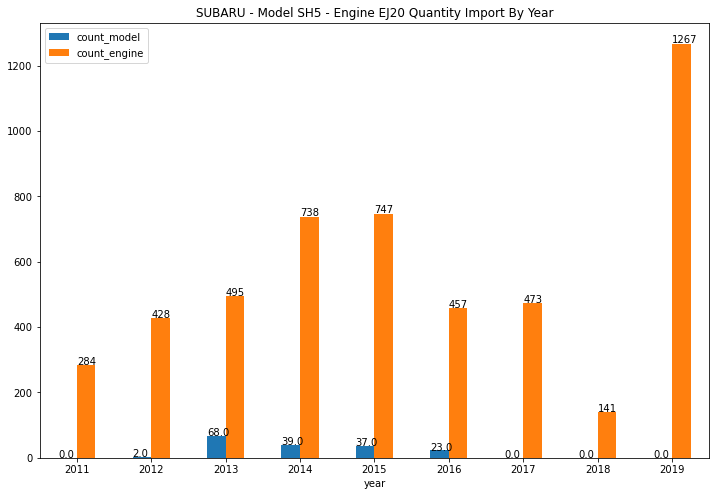

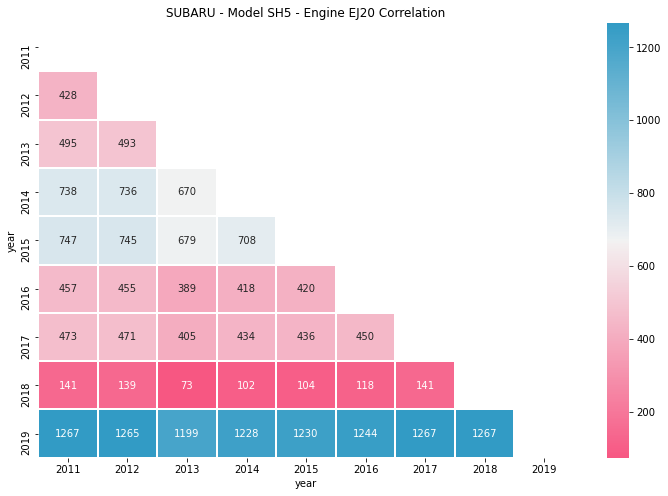

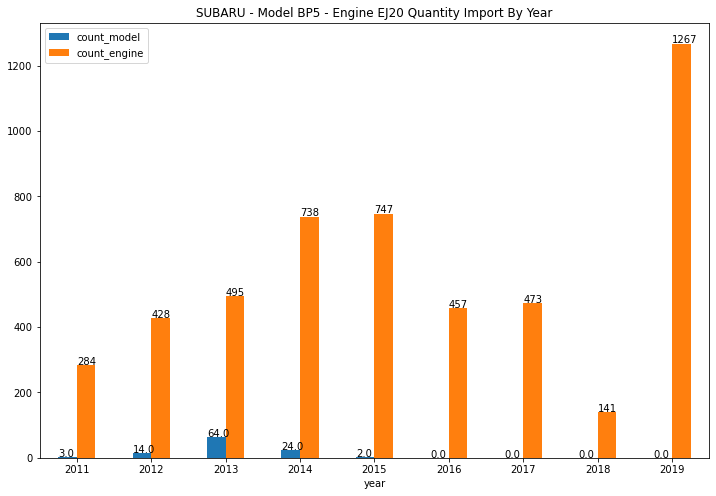

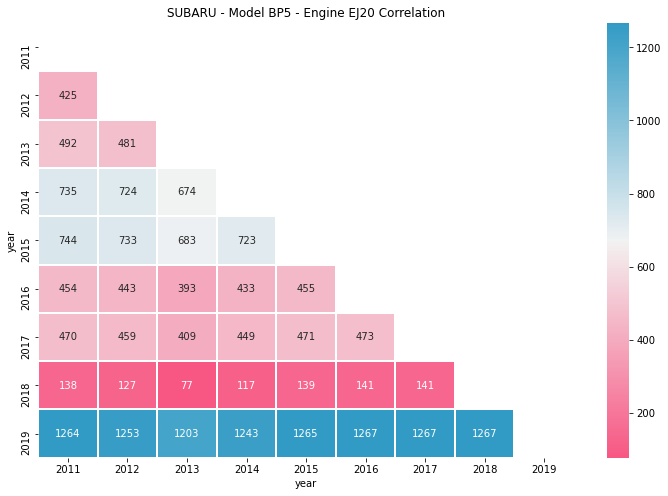

In [439]:
for brand in list_brand:
  list_extract_model = globals()[f'df_all_{brand.lower()}']['list_extract_model'].sum()
  list_common_model = dict(Counter(list_extract_model).most_common(20))
  list_common_model = dict(sorted(list_common_model.items(), key=lambda item: item[1],reverse=True))
  df_common_model = pd.DataFrame(list_common_model.items())

  plt.figure(figsize=(12,8))
  plt.xticks(rotation=90)
  ax = sns.barplot(x=0,y=1,data=df_common_model)
  ax.set(xlabel = 'Model Car', ylabel='Count', title=f'{brand} Most Common Model')
  
  list_best_model = list(dict(Counter(list_extract_model).most_common(3)).keys())
  list_best_engine=[]
  for model in list_best_model:
    globals()[f'df_{model}'] = globals()[f'df_all_{brand.lower()}'][globals()[f'df_all_{brand.lower()}'].apply(lambda x: model in x['list_extract_model'],axis=1)]
    globals()[f'list_engine_model_{model}'] = list(globals()[f'df_{model}']['list_extract_engine'])
    globals()[f'list_best_engine_model_{model}']= list(to_1D(globals()[f'list_engine_model_{model}']))
    globals()[f'list_best_engine_model_{model}'] = list(dict(Counter(globals()[f'list_best_engine_model_{model}']).most_common(3)).keys())
    list_best_engine.extend(globals()[f'list_best_engine_model_{model}'])

  
  for engine,model in zip(list_best_engine,list_best_model):
     globals()[f'df_all_{model.lower()}'] = globals()[f'df_all_{brand.lower()}'][globals()[f'df_all_{brand.lower()}'].apply(lambda x:model in x['list_extract_model'],axis = 1) & (globals()[f'df_all_{brand.lower()}'].count_extract_engine >0)]
     globals()[f'df_all_year_{model}'] = globals()[f'df_all_{model.lower()}'].groupby(['year'])['count_extract_model'].sum().reset_index()

     globals()[f'df_extract_em_{brand.lower()}']['list_extract_engine'] = globals()[f'df_extract_em_{brand.lower()}']['Product Description'].map(lambda x:extract_specific_engine_data(x,engine))
     globals()[f'df_extract_em_{brand.lower()}']['len_list_engine'] = globals()[f'df_extract_em_{brand.lower()}']['list_extract_engine'].map(lambda x : len(x))
     globals()[f'df_extract_em_{brand.lower()}']['year']  = globals()[f'df_extract_em_{brand.lower()}']['Register Date'].dt.year
     globals()[f'df_group_{engine}'] = globals()[f'df_extract_em_{brand.lower()}'].groupby(['year'])['len_list_engine'].sum().reset_index()

     df_merge = globals()[f'df_all_year_{model}'].merge(globals()[f'df_group_{engine}'] ,on = 'year',how='outer')
     df_merge = df_merge.sort_values(by=['year'])
     df_merge.fillna(value=0,inplace=True)
     df_merge.rename(columns={"count_extract_model":"count_model","len_list_engine":"count_engine"},inplace=True)
     df_merge.set_index('year',inplace=True)


     ax1 = df_merge.plot.bar(figsize=(12,8),rot=0,title=f'{brand}' + ' - ' + f'Model {model}' + ' - ' + f'Engine {engine}' + ' Quantity Import By Year')
     for p in ax1.patches:
        ax1.annotate(str(p.get_height()), (p.get_x() * 0.9995, p.get_height() * 1.0020))

     corr = df_merge.T.corr(method=correlation)
     mask = np.triu(np.ones_like(corr, dtype=np.bool))
     cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
     plt.figure(figsize=(12,8))
     plt.title(f'{brand}' + ' - ' + f'Model {model}' + ' - ' + f'Engine {engine}' + ' Correlation' )
     sns.heatmap(corr, mask=mask,cmap=cmap,linewidths=1,annot=True,fmt='g')
